# Assignment 3 - Neural Network

$\textbf{NAME : CHAITANYA DARADE}$

# Introduction


### Objective and approach : 

This assignment aims to implement the Neural Network model for nonlinear regression and nonlinear logistic regression methods. To do so, 5-fold cross-validation is implemented to find good neural network parameters and report the CV accuracies.NeuralNet class is used for both the nonlinear regression model and the nonlinear logistic regression model.

#### Nonlinear Regression:
It is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.

# Data - description

This dataset comprises prices of 50,000 round cut diamonds. It's containing the prices and other attributes of almost 54,000 diamonds. The variables are as follows:

* $\textbf{File information}$ :

diamonds.csv (53940*10)

* $\textbf{Attribute Information}$:

A data frame with 53940 rows and 10 variables:

1 : price price in US dollars ( 326 – 18,823)

2 : carat weight of the diamond (0.2–5.01)

3 : cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4 : color diamond colour, from J (worst) to D (best)

5 : clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6 : x length in mm (0–10.74)

7 : y width in mm (0–58.9)

8 : z depth in mm (0–31.8)

9 : depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)

10: table width of top of diamond relative to widest point (43–95)    

11: dimension volume of the diamond(Additional feature ‘dimension ’is added to understand the volume(i.e dimension)       of diamond.)

Source : shivamagrawal, "Analyze diamonds by their cut, color, clarity, price, and other attributes" https://www.kaggle.com/shivam2503/diamonds#diamonds.csv

# Data - Plots for understanding and Preliminary observation

## Reading the Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

diamonds_data=pd.read_csv('diamonds.csv',index_col=0)
print(diamonds_data.head())

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [2]:
diamonds_data.shape

(53940, 10)

In [3]:
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
diamonds_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Correlation Between Features

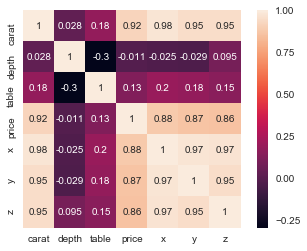

In [6]:
corr = diamonds_data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In order to make a correlation between all independent variables to that of dependent variable, encoding the categorical variables is essential step.

### Encoding

In [7]:
labelencoder = LabelEncoder()
diamonds_data['cut'] = labelencoder.fit_transform(diamonds_data['cut'])
diamonds_data['color'] = labelencoder.fit_transform(diamonds_data['color'])
diamonds_data['clarity'] = labelencoder.fit_transform(diamonds_data['clarity'])

In [8]:
corr = diamonds_data.corr()
round(corr,2)

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.00,0.02,0.29,-0.21,0.03,0.18,0.92,0.98,0.95,0.95
cut,0.02,1.00,0.00,0.03,-0.19,0.15,0.04,0.02,0.03,0.00
color,0.29,0.00,1.00,-0.03,0.05,0.03,0.17,0.27,0.26,0.27
clarity,-0.21,0.03,-0.03,1.00,-0.05,-0.09,-0.07,-0.23,-0.22,-0.22
depth,0.03,-0.19,0.05,-0.05,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,0.15,0.03,-0.09,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,0.04,0.17,-0.07,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,0.02,0.27,-0.23,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,0.03,0.26,-0.22,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.00,0.27,-0.22,0.09,0.15,0.86,0.97,0.95,1.00


## Visualization Of All Features

### Carat vs Price

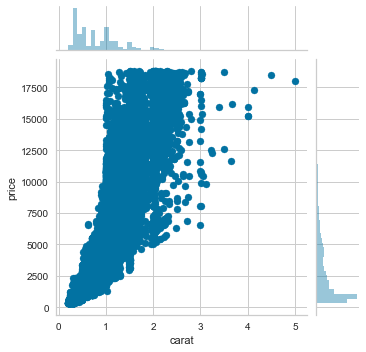

In [9]:
sns.jointplot(x='carat' , y='price' , data=diamonds_data , height=5)

#### Carat varies with Price Exponentially

### Cut vs Price

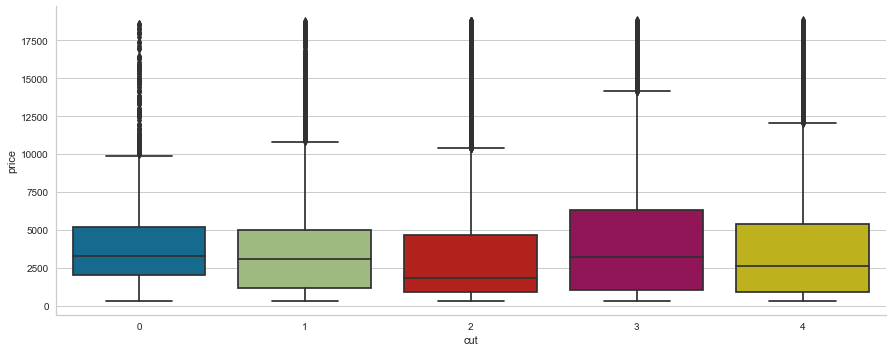

In [10]:
sns.catplot(x='cut', y='price', data=diamonds_data, kind='box' ,aspect=2.5 )

#### Premium Cut on Diamonds as we can see are the most Expensive, followed by Excellent / Very Good Cut.

### Clarity vs Price

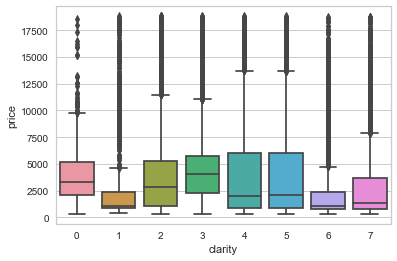

In [11]:
sns.boxplot(x='clarity', y='price', data=diamonds_data )

#### It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin

### Depth vs Price

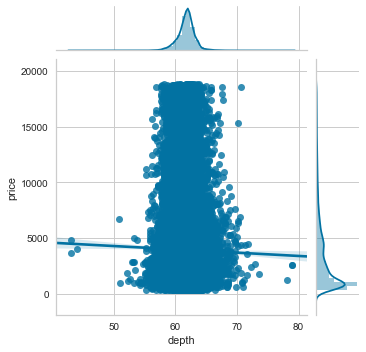

In [12]:
sns.jointplot(x='depth', y='price' , data=diamonds_data , kind='regplot', height=5)

#### We can Infer from the plot that the Price can vary heavily for the same Depth and And the Pearson's Correlation shows that there's a slightly inverse relation between the two.

### Dimension vs Price

(2, 10)

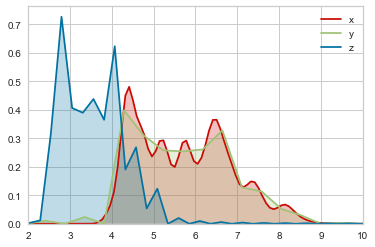

In [13]:
sns.kdeplot(diamonds_data['x'] ,shade=True , color='r' )
sns.kdeplot(diamonds_data['y'] , shade=True , color='g' )
sns.kdeplot(diamonds_data['z'] , shade= True , color='b')
plt.xlim(2,10)

#### We'll Create a New Feature based on the Dimensions in the Next Section called 'Dimension' and Visualize how it affects the Price.

## Observatory Conclusions

1.  Depth is inversely related to Price.
       This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.
       

2.  The Price of the Diamond is highly correlated to Carat, and its Dimensions.


3.  The Weight (Carat) of a diamond has the most significant impact on its Price. 
       Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.
       
    
4.  The Length(x), Width(y) and Depth(z) seems to be higly related to Price and even each other.


5.  Self Relation ie. of a feature to itself is 1 as expected.


6.  Some other Inferences can also be drawn.

# Data - Preprocessing of the data

In [14]:
diamonds_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Feature Extraction

Creating a new Feature based on the Dimensions in the Next Section called 'Dimension' to Visualize how it affects the Price.

In [15]:
diamonds_data['dimension'] = diamonds_data['x'] * diamonds_data['y'] * diamonds_data['z']

## Encoding 

Encoding Categorical Variables 'Cut', 'Color', 'Clarity'

In [16]:
labelencoder = LabelEncoder()
diamonds_data['cut'] = labelencoder.fit_transform(diamonds_data['cut'])
diamonds_data['color'] = labelencoder.fit_transform(diamonds_data['color'])
diamonds_data['clarity'] = labelencoder.fit_transform(diamonds_data['clarity'])

In [17]:
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [18]:
diamonds_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,129.849403
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,78.245262
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,65.136830
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.808572
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,170.842451
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


From above descriptive data, its not possible to have either of Length or Width or Depth to be zero Let see how much such data is present:

In [19]:
diamonds_data.loc[(diamonds_data['dimension']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
2208,1.00,3,3,3,59.1,59.0,3142,6.55,6.48,0.0,0.0
2315,1.01,3,4,0,58.1,59.0,3167,6.66,6.60,0.0,0.0
4792,1.10,3,3,3,63.0,59.0,3696,6.50,6.47,0.0,0.0
5472,1.01,3,2,3,59.2,58.0,3837,6.50,6.47,0.0,0.0
10168,1.50,1,3,0,64.0,61.0,4731,7.15,7.04,0.0,0.0
11183,1.07,2,2,3,61.6,56.0,4954,0.00,6.62,0.0,0.0
11964,1.00,4,4,5,63.3,53.0,5139,0.00,0.00,0.0,0.0
13602,1.15,2,3,5,59.2,56.0,5564,6.88,6.83,0.0,0.0
15952,1.14,0,3,4,57.5,67.0,6381,0.00,0.00,0.0,0.0
24395,2.18,3,4,3,59.4,61.0,12631,8.49,8.45,0.0,0.0


In [20]:
len(diamonds_data.loc[(diamonds_data['x']==0) | (diamonds_data['y']==0) | (diamonds_data['z']==0)])

20

There are 20 rows with Dimensions 'Zero'.Dropping them as it seems better choice instead of filling them with any of Mean or Median.

In [21]:
diamonds_data.drop(diamonds_data[diamonds_data['dimension'] == 0].index, inplace = True) 

In [22]:
diamonds_data.loc[(diamonds_data['x']==0) | (diamonds_data['y']==0) | (diamonds_data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension


In [23]:
corr = diamonds_data.corr()
round(corr,2)

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
carat,1.00,0.02,0.29,-0.21,0.03,0.18,0.92,0.98,0.95,0.96,0.98
cut,0.02,1.00,0.00,0.03,-0.19,0.15,0.04,0.02,0.03,0.00,0.02
color,0.29,0.00,1.00,-0.03,0.05,0.03,0.17,0.27,0.26,0.27,0.28
clarity,-0.21,0.03,-0.03,1.00,-0.05,-0.09,-0.07,-0.23,-0.22,-0.23,-0.21
depth,0.03,-0.19,0.05,-0.05,1.00,-0.30,-0.01,-0.03,-0.03,0.10,0.01
table,0.18,0.15,0.03,-0.09,-0.30,1.00,0.13,0.20,0.18,0.15,0.17
price,0.92,0.04,0.17,-0.07,-0.01,0.13,1.00,0.89,0.87,0.87,0.90
x,0.98,0.02,0.27,-0.23,-0.03,0.20,0.89,1.00,0.97,0.98,0.96
y,0.95,0.03,0.26,-0.22,-0.03,0.18,0.87,0.97,1.00,0.96,0.98
z,0.96,0.00,0.27,-0.23,0.10,0.15,0.87,0.98,0.96,1.00,0.95


As independent variables such as 'Carat' and 'Length'(x),'Width'(y),'Depth'(z) (combined in feature 'dimension') are highly correlated to dependant variable 'price'. These four features will be considered for training the model whereas price is dependant variable. 

In [24]:
#X_Dataframe = diamonds_data[['carat','dimension']]  # It's a Training dataframe, partitioned afterwards
X_Dataframe = diamonds_data
X_Dataframe = X_Dataframe.drop('price', axis=1)
y_Dataframe = diamonds_data['price']                # Depandant variable
y_Dataframe = y_Dataframe.to_frame()

In [25]:
X_Dataframe.head()

,carat,cut,color,clarity,depth,table,x,y,z,dimension
1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,38.202030
2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,34.505856
3,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,38.076885
4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,46.724580
5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,51.917250


In [26]:
y_Dataframe.shape

(53920, 1)

# Summary of Neural Networks, NonLinear Regression, Cross Validation and Activation function

#### Neural Networks

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. Neural networks help us cluster and classify. Neural networks composed of several layers, such as, input layer, an output layer and hidden layer. The layers are made of nodes. A node is just a place where computation happens. A node combines input from the data with a set of coefficients, or weights, that either amplify or dampen that input, and transfer the result to the output layer. It gives significance to the input which is most helpful is classifying data without error.These input-weight products are summed and then the sum is passed through a node’s so-called activation function, to determine whether and to what extent that signal should progress further through the network to affect the ultimate outcome, say, an act of classification. If the signals passes through, the neuron has been “activated.”This process is called forward propagation.These computed values are compared with actual values and the weights are updated based on the errors. This process is called Backward propagation.

#### Nonlinear Regression

Nonlinear regression is a form of regression analysis in which data is fit to a model. Simple linear regression relates two variables and gives a straight line y = mx + c while nonlinear regression will generate a curve. The main objective of the model is to make the sum of the squares as small as possible. The sum of squares is used to check how our observations are varying from the mean of the data set. The smaller the sum of these squared figures, the better the function fits the data points in the set.

#### Cross validation
Cross validation divides the training data into several parts (K parts) of approximately equal size. In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value. In this assignment, I've used 5 fold cross validation.

#### Activation function
These are mapping functions who take some input on the x-axis and output a value in a restricted range. They are used to convert large outputs from the units into a smaller value — most of the times — and promote non-linearity in your Neural Network. Your choice of an activation function can drastically improve or hinder the performance of Neural Network. Different activation functions can be used for different units like tanh, ReLu, Leaky ReLu, Sigmoid, step function, etc.

## Neural Network

In [27]:
# standardization class
class Standardizer:
    """ class version of standardization """
    def __init__(self, X, explore=False): 
        self._mu = np.mean(X,0) 
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))
            
    def set_sigma(self, s): self._sigma[:] = s
        
    def standardize(self,X):
        return (X - self._mu) / self._sigma

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu

In [28]:
""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""

from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [29]:
from sklearn.metrics import mean_squared_error

# Cross Validation

## Code

In [30]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            list1=[]
            X_train=[]
            X_train = np.array(X_train)
            T_train=[]
            T_train = np.array(T_train)
            ft = 1
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            
            for j in range(0,5):
                if(j!=i and j!=k):
                    list1.append(j)
                    
            for j in list1:
                if ft == 1 :
                    X_train = X_partitioned[j]
                    T_train = T_partitioned[j]
                    ft = 0
                else :
                    X_train = np.vstack((X_train,X_partitioned[j]))
                    T_train = np.vstack((T_train,T_partitioned[j]))
                #T_train.concatenate(T_partitioned[j], axis=0)
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

## CV Summary and Explanation of codes


### Cross validation

Cross validation divides the training data into several parts (K parts) of approximately equal size. In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value. In this assignment,5 fold cross validation is implemented.

#### Cross validation Advantages:
•	Validation help us evaluate the quality of the model
•	Validation help us select the model which will perform best on unseen data
•	Validation help us to avoid overfitting and underfitting.


### Explanation of Codes


The split function is used to divide the data into partitions. As it is 5 -fold cross-validation, we split the entire training dataset into 5 parts using split function i.e. each part contains 20% of the data(approx. 10000 records for our dataset). So myList is a list of lists, which holds 5 lists, where each list contains 20% of the data we just split using split function. Split function return this list of lists(myList) to the main cross_validate function.

The cross_validate function takes X which contains the sample, T which contains the target values of the samples and model parameters as input. This function returns the final_list and best_paramlist. This function first divides data into 5 partitions using split() function. The returned list of lists, where each sublist is 20% of the total data is iterated in the following steps:

Below 3 steps are performed iteratively 5 (k fold) times:

1: First we take first 20% of the data as a test set
    
   For this test set below steps are performed:

    •    Out of remaining data, 20% of the data is kept as a validation set
    •    Remaining 60% of the data as a training set
    •    Trained the model on this train data values and kept RMSE values in rmselist and respective parameters in            paramlist
    •    Minimum rmse from above steps stored in history_rmse and corresponding parameters in params list
2: Again trained the model with 80% of the data(combining cross-validate set and train set) against best params we      calculated from steps a,b,c and d and calculate final best rmse list and best parameter list
3: Continue with step 1 with the next 20% test set


4: With the best parameter obtained from the best parameter list from the above 3 steps, we trained the 80% of the entire data and tested against 20% of the remaining data and calculated final RMSE.

## Presentation of CV result

In [31]:
import warnings 
warnings.filterwarnings('ignore')


models = [[10,3,1],[10,5,1],[10,7,1], [10,6,1], [10,8,1]]
bestAccuracy,bestParam = cross_validate(np.array(X_Dataframe[:5000]), np.array(y_Dataframe[:5000]), models)

Test number:  0
K is :  0
K is :  1
[[10, 3, 1], [10, 5, 1], [10, 7, 1], [10, 6, 1], [10, 8, 1]]
[353.9919874143596, 349.51259884770013, 328.073528975108, 340.8472887324357, 325.51877992317355]
325.51877992317355
[10, 8, 1]
K is :  2
[[10, 3, 1], [10, 5, 1], [10, 7, 1], [10, 6, 1], [10, 8, 1]]
[198.68188613830725, 194.84227485414695, 184.39586540770577, 209.47238112836015, 167.08163761895014]
167.08163761895014
[10, 8, 1]
K is :  3
[[10, 3, 1], [10, 5, 1], [10, 7, 1], [10, 6, 1], [10, 8, 1]]
[179.82867183348486, 174.80690499692798, 182.3743719244226, 179.98512570627688, 181.12166375217132]
174.80690499692798
[10, 5, 1]
K is :  4
[[10, 3, 1], [10, 5, 1], [10, 7, 1], [10, 6, 1], [10, 8, 1]]
[370.77731531709117, 364.30527081979875, 361.2108603032742, 364.34920887691106, 364.0605688774987]
361.2108603032742
[10, 7, 1]
[[10, 8, 1], [10, 8, 1], [10, 5, 1], [10, 7, 1]]
[325.51877992317355, 167.08163761895014, 174.80690499692798, 361.2108603032742]
[10, 5, 1]
Test number:  1
K is :  0
[[10, 3,

In [32]:
from sklearn import model_selection

In [33]:
print(bestAccuracy,bestParam)

[159.5879895048544, 170.3882591043156, 357.6828873541061, 541.8364284893855, 757.1045764298678] [[10, 5, 1], [10, 5, 1], [10, 5, 1], [10, 7, 1], [10, 7, 1]]


In [34]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(X_Dataframe[:5000]),np.array(y_Dataframe[:5000]),test_size=0.30,random_state=40)

In [35]:
model=NeuralNet([10,7,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

{'w': array([-0.02621462, -2.24184111, -0.1175011 , -4.74993196,  0.87461087,
         0.2809582 , -0.04361188, -0.3562554 , -0.75343088, -0.02895813,
         2.32087852,  0.68843856, -0.50934981,  1.4333709 , -0.01892342,
         0.15874279, -0.98859365,  0.01809343,  0.0401943 ,  0.51527936,
        -0.02123772,  0.0451652 ,  0.82095458,  0.44486293, -0.27194276,
        -0.30614765, -0.31316823, -0.48944486, -0.29438248,  0.00489246,
        -0.46257459, -3.7554763 ,  0.28310876,  0.28703159,  0.05192744,
         0.10397887, -0.30958427,  0.67646078, -0.02122287, -0.11399642,
        -0.26933998, -0.06646922,  0.03363537, -0.00483641, -0.84106802,
         0.10010102,  0.03812767,  0.53597716, -0.04911681,  0.02650921,
        -2.49438584, -0.53673384, -0.33197815, -0.4814561 ,  0.57382298,
        -1.54728216, -0.63072968, -0.47610494, -0.5501548 ,  0.44211985,
         0.30271575,  1.38630149,  1.34492613, -1.08202116, -0.52033008,
        -1.25128039, -0.1803259 ,  0.71688404,

In [36]:
type(X_test)

numpy.ndarray

In [37]:
y_pred=model.use(X_test)

In [38]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 223.6351430858765
R squared value: 0.9389657661405608


## Plots of results

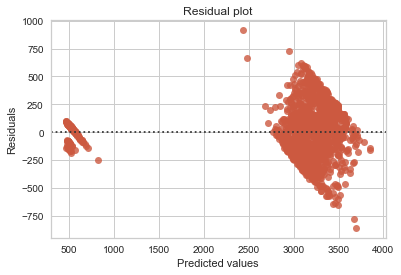

In [39]:
# Residual plot for LinearRegress model
sns.residplot(y_pred.flatten(), y_test.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

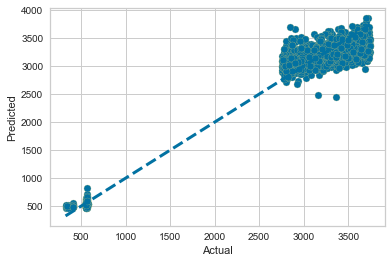

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

Text(0.5, 1.0, 'NN model predictions')

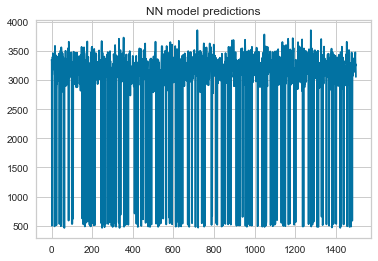

In [41]:
plt.plot(y_pred)
plt.title("NN model predictions")

## Discussions about parameter/network structure choice

### Explanation of CV results

3 layer neural network is built for regression dataset. Input layer has 10 nodes because there are 10 features in my data. Output layer has 1 node.

After performing 5 fold cross validation(with test,validate and training set), performed 5 fold cross validation by passing my models variable as [[10, 5, 1], [10, 5, 1], [10, 5, 1], [10, 7, 1], [10, 7, 1]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes.

From the results of cross validation we can see that model [10, 5, 1] has appeared more number of times with minimum RMSE. The rmse values returned for [10, 5, 1] in the final result are [159.5879895048544, 170.3882591043156, 357.6828873541061] and for [10, 7, 1] as [541.8364284893855, 757.1045764298678]

The model with number of nodes in hidden layer 3 works better. With more number of nodes in hidden layer network its overfitting the data.

Hence, I've used [10, 5, 1] as the final structure.

### Discussions about Prediction results

In this assignment I have performed regression analysis using Neural network which is non linear regression problem. On training the model using NeuralNet with optimum structure [10, 5, 1], model has produced a RMSE: 0.9389657661405608 R squared value: 0.9389657661405608 for 100 iterations.

We are free to choose hidden layers, hidden nodes that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used tanh as activation function. The gradient is updating the weights in each layer during back propagation which made network work so well.

I tried with 10 nodes and 1000 iterations I got R squared value around 0.98. There's a strange variation in results obtained by this dataset. For increasing number of layers, the model should have improved but it seems like model with 3 layers is better for this dataset.

# Nonlinear Logistic Regression

## Data Description

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
File information :
winequality-red2.csv winequality-white2.csv
(12994*14)
Attribute Information:
For more information Input variables (based on physicochemical tests):
1 : fixed acidity
Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids)

2 : volatile acidity These acids are to be distilled out from the wine before completing the production process.

3 : citric acid This is one of the fixed acids which gives a wine its freshness.

4 : residual sugar This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped.

5 : chlorides This is usually a major contributor to saltiness in wine.

6 : free sulfur dioxide This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds

7 : total sulfur dioxide This is the sum total of the bound and the free sulfur dioxide This is mainly added to kill harmful bacteria and preserve quality and freshness.

8 : density This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water.It is generally used as a measure of the conversion of sugar to alcohol.

9 : pH Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine.

10: sulphates These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential.

11: alcohol Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine.

12: quality (score between 0 and 10) Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.
Additional two features are added : First is to determine type of wine and second is to determine wine quality.

13: wine_type Type of wine(red or white)

14: wine_quality(Classification feature) Quality of the wine(low or mediun or high)

Source : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Data - Plots for understanding and Preliminary observation

## Reading the Data

## Reading the Data

Both data files(winequality-red2.csv, winequality-white2.csv) are read with pandas dataframes and concatenated into
single one.

It's shape and info is being displayed after merging them in preprossessing section.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, classification_report

In [43]:
red_wine_data = pd.read_csv('winequality-red2.csv',sep=',')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
white_wine_data = pd.read_csv('winequality-white2.csv',sep=',')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Preprocessing of the Data

In preprocessing activity, Additional two features are added : First is to determine type of wine and second is to determine wine quality.
Then both datasets are concatenated into single dataframe

Quality is being classified in two classes i.e 'low' and 'high'

In [45]:
red_wine_data['wine_type'] = 'red'
red_wine_data['wine_quality'] = red_wine_data['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'high')
red_wine_data['wine_quality'] = pd.Categorical(red_wine_data['wine_quality'], 
                                           categories=['low','high'])
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [46]:
white_wine_data['wine_type'] = 'white'
white_wine_data['wine_quality'] = white_wine_data['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'high' )

white_wine_data['wine_quality'] = pd.Categorical(white_wine_data['wine_quality'], 
                                             categories=['low', 'high'])
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,high
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,high
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,high


In [47]:
wine_data=pd.concat([red_wine_data,white_wine_data])
wine_data = wine_data.sample(frac=1, random_state=95).reset_index(drop=True)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,red,low
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,white,low
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,white,high
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,white,high
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,white,low


In [48]:
le = preprocessing.LabelEncoder()
wine_data['wine_quality'] = le.fit_transform(wine_data['wine_quality']) 
wine_data['wine_type'] = le.fit_transform(wine_data['wine_type']) 
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,0
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,0
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,1


In [49]:
wine_data.shape

(12994, 14)

In [50]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,0
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,0
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,1


In [51]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 14 columns):
fixed acidity           12994 non-null float64
volatile acidity        12994 non-null float64
citric acid             12994 non-null float64
residual sugar          12994 non-null float64
chlorides               12994 non-null float64
free sulfur dioxide     12994 non-null float64
total sulfur dioxide    12994 non-null float64
density                 12994 non-null float64
pH                      12994 non-null float64
sulphates               12994 non-null float64
alcohol                 12994 non-null float64
quality                 12994 non-null int64
wine_type               12994 non-null int64
wine_quality            12994 non-null int64
dtypes: float64(11), int64(3)
memory usage: 1.4 MB


## Visualization of the Data and Preliminary obervations

In [52]:
data_cols = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine_data[data_cols].describe(),2)
ws = round(white_wine_data[data_cols].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Stats', 'White Wine Stats'])

Red Wine Stats                                                           \
      residual sugar total sulfur dioxide sulphates  alcohol volatile acidity   
count        3198.00              3198.00   3198.00  3198.00          3198.00   
mean            2.54                46.47      0.66    10.42             0.53   
std             1.41                32.89      0.17     1.07             0.18   
min             0.90                 6.00      0.33     8.40             0.12   
25%             1.90                22.00      0.55     9.50             0.39   
50%             2.20                38.00      0.62    10.20             0.52   
75%             2.60                62.00      0.73    11.10             0.64   
max            15.50               289.00      2.00    14.90             1.58   

               White Wine Stats                                          \
       quality   residual sugar total sulfur dioxide sulphates  alcohol   
count  3198.00          9796.00              9796.00   9796.00  9796.00   
mean      5.64             6.39               138.36      0.49    10.51   
std       0.81             5.07                42.50      0.11     1.23   
min       3.00             0.60                 9.00      0.22     8.00   
25%       5.00             1.70               108.00      0.41     9.50   
50%       6.00             5.20               134.00      0.47    10.40   
75%       6.00             9.90               167.00      0.55    11.40   
max       8.00            65.80               440.00      1.08    14.20   

                                 
      volatile acidity  quality  
count          9796.00  9796.00  
mean              0.28     5.88  
std               0.10     0.89  
min               0.08     3.00  
25%               0.21     5.00  
50%               0.26     6.00  
75%               0.32     6.00  
max               1.10     9.00

In [53]:
wines_corr = wine_data.corr()
round(wines_corr,2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08,-0.49,0.07
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27,-0.65,0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09,0.19,-0.08
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04,0.35,0.03
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20,-0.51,0.18
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06,0.47,-0.04
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04,0.70,0.05
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31,-0.39,0.27
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02,-0.33,-0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04,-0.49,-0.04


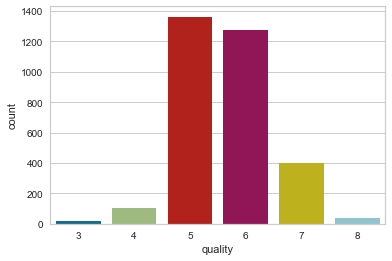

In [54]:
ax = sns.countplot(x=red_wine_data.quality, data=red_wine_data)

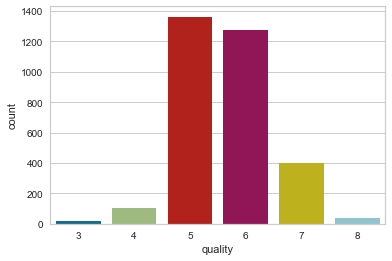

In [55]:
ax = sns.countplot(x=red_wine_data.quality, data=white_wine_data)

### Obeservation:

According to the data description, quality is a score between 0 to 10. But we can see that red and white wine doesn't have any values in the low and high extreme ends of the scale 0 to 10. In addition we can also see that the quality rating are kind of normally distributed with large ditribution in the center of the scale around 5 and 6 and flatenning out in the ends. The normal distibution of the quality is true because there is will be few top wines in the market and then followed by bunch of medium quality wines and then the lower ends.


Is the quality of wine depends on the alcohol level in the wine? This is a interesting problem to anwser. So lets dive in.

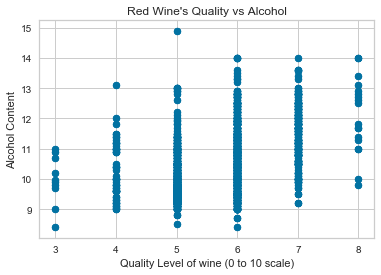

In [56]:
plt.scatter(x = red_wine_data.quality, y = red_wine_data.alcohol, marker='o')
plt.title("Red Wine's Quality vs Alcohol")
plt.xlabel("Quality Level of wine (0 to 10 scale)")
plt.ylabel("Alcohol Content")
plt.show()

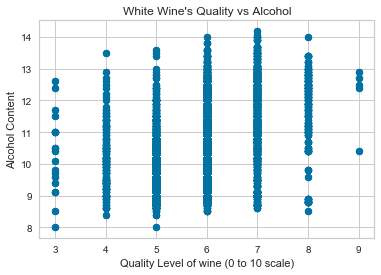

In [57]:
plt.scatter(x = white_wine_data.quality, y = white_wine_data.alcohol, marker='o')
plt.title("White Wine's Quality vs Alcohol")
plt.xlabel("Quality Level of wine (0 to 10 scale)")
plt.ylabel("Alcohol Content")
plt.show()

### Obeservation

When we look at the red and white wine's alcohol content we can see some increasing trend from the lower quality rating to the high quality rating. This shows that quality is depend on the alcohol content in the wine. But how much does the quality depends on the Alcohol content. In order to answer that question, we will try to address the all the rlation between the the variables in our dataset using correlation and heatmaps.

In [58]:
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()

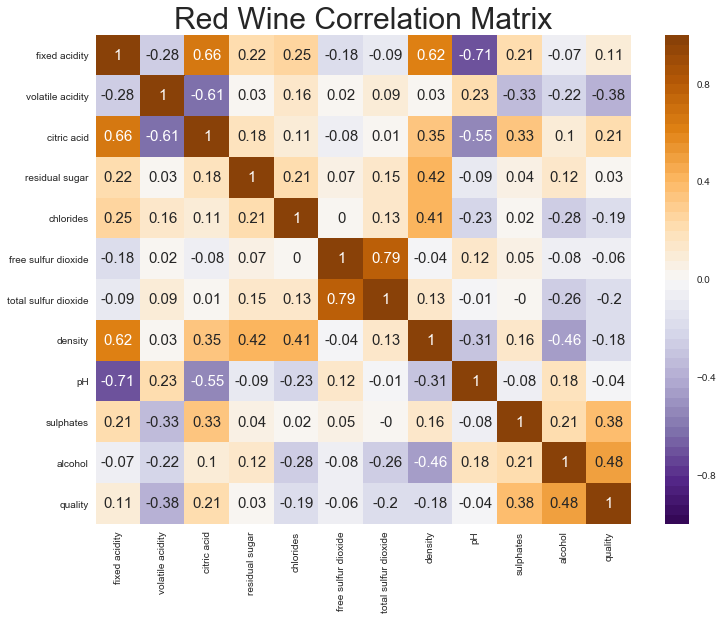

In [59]:
# Call the confusion matrix function
confusion_matrix_plot(red_wine_data, title = "Red Wine Correlation Matrix")

Heatmap shows the correlation between the variables in the dataset. High concentration of color representation high corrlation. Brown represents positive and purple represents negative correlation.

From the above heatmap on the red wine, we have the following inference

1 : It looks like we have pH and fixed acidity has inverse relationships between them. The same in case of citric acid and volatile acidity too.

2 : There is a strong positive relationship between total sulfur dioxide and free sulfur dioxide.

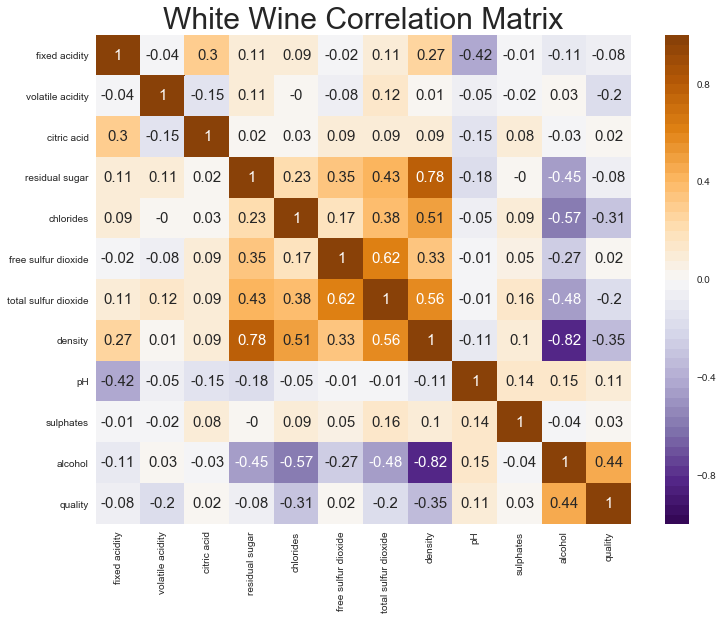

In [60]:
confusion_matrix_plot(white_wine_data, title = "White Wine Correlation Matrix")

From the above white wine heatmap, we have the following inferences:
1 : We see that low density contents are high on alcohol content

2 : Sugar content in the wine might represents the wine density

3 : Just like red wine, here also total and free sulfur dioxide are related together

Now that we have seen much about the predictors lets see the responding varaible quality and how it is related to the predictors. We see the quality is more depend on the folowwing from both red and white wines

### Positive relation (Increase in this will increase the quality)

* ${Alcohol}$:

* ${Sulphates}$:

### Positive relation (Increase in this will decrease the quality)

* ${Density}$:

* ${Volatile acidity}$:

* ${Chlorides}$:

In [61]:
wine_data['wine_quality'] = wine_data['wine_quality'].apply(lambda value: 1 if value == 0 else -1 )

In [62]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,-1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,-1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,1
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,1
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,-1


## Summary of nonlinear logistic regression

The linear logistic regression that uses the softmax layer for classification along with a linear model. In nonlinear logistic regression extra layers are added called as hidden layers. With the inclusion of hidden layer the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output. 


 $$
wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$
 
 
<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm \\
Gm & = softmax(Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm -Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
Wm &\leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h Xlm^\top \Big( (Tm - Gm) Wm^\top \odot (1 - Zm^2) \Big)\\
Wm &\leftarrow Wm + \alpha_o Zlm^\top \Big(  Tm - Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>

</tr>
</table> 

In [63]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

# Explanation of code 

There is a NeuralNetLogReg class which has following functions: 

1. __init__ function is a constructor of the class which calls the NeuralNet class' constructor for assigning values to nLayers i.e the number of layers for the model. <br><br>

2. _nLayers is the number of hidden unit layers. <br> <br>

3. rho is the learning rate attribute of the class. <br> <br>

4. _W is the weights. <br> <br>

5. _weights is the weights that is _W written in one dimension. <br> <br>

6. stdX is the standardization class for the data. <br> <br>

7. stdT is the standardization class for the target. <br>

8.  The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda

9. Forward pass in neural network propagates same as in the class discussed above the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives output to the output layer. 


10. Activation function is used to make the network nonlinear. <br> <br>

11. In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass. <br> <br>

 $$
 W \leftarrow W + \alpha_o Zl^\top \Big(  T - g(X)\Big).
 $$


$$
 V \leftarrow V + \alpha_h Xl^\top \Big( (T - g(X)) W^\top \odot (1 - Z^2) \Big).
$$
 

In [64]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

from sklearn.metrics import roc_curve, auc

# Testing model with Dummy/Toy Data

Text(0.5, 1.0, 'test data set')

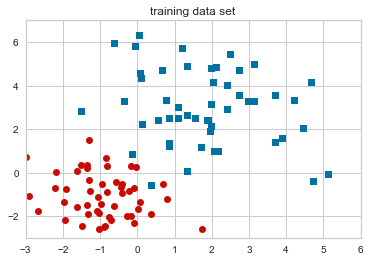

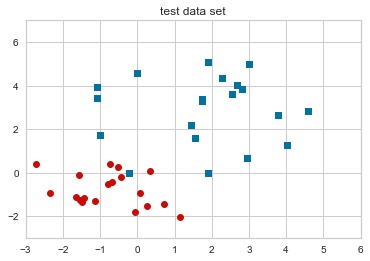

In [111]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'sb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'sb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")


In [112]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

In [113]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [114]:
classes

array([[0.51949205, 0.48050795],
       [0.51589026, 0.48410974],
       [0.51941853, 0.48058147],
       [0.51440375, 0.48559625],
       [0.51002203, 0.48997797],
       [0.51883566, 0.48116434],
       [0.52010226, 0.47989774],
       [0.51514553, 0.48485447],
       [0.51069224, 0.48930776],
       [0.51001943, 0.48998057],
       [0.51328613, 0.48671387],
       [0.52144475, 0.47855525],
       [0.51240839, 0.48759161],
       [0.52179359, 0.47820641],
       [0.51770862, 0.48229138],
       [0.51906375, 0.48093625],
       [0.5185109 , 0.4814891 ],
       [0.51891387, 0.48108613],
       [0.51711869, 0.48288131],
       [0.51859739, 0.48140261],
       [0.50518731, 0.49481269],
       [0.49773553, 0.50226447],
       [0.5091631 , 0.4908369 ],
       [0.49372577, 0.50627423],
       [0.50085266, 0.49914734],
       [0.50052485, 0.49947515],
       [0.50667598, 0.49332402],
       [0.50249309, 0.49750691],
       [0.50289321, 0.49710679],
       [0.49739304, 0.50260696],
       [0.

Accuracy:  50.0 %


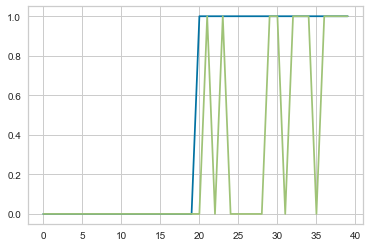

In [115]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

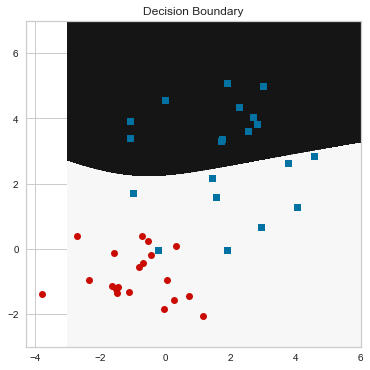

In [117]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'sb')

## Discussion about dummy data 

The code works well with 50% accuracy. Hence, we can say that our NeuralNetLogReg class is working. 

# Testing on classification dataset

In [71]:
from sklearn import model_selection
from sklearn.metrics import r2_score
X_Dataframe= wine_data.drop(['wine_quality'],axis=1)
y_Dataframe = wine_data['wine_quality']

In [72]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(X_Dataframe,y_Dataframe,test_size=0.20,random_state=42)

In [73]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [74]:
X_Dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1


In [75]:
nn = NeuralNetLogReg([13,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

# Plots and results

In [76]:
y_test=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test, l))
print('Accuracy:', accuracy_score(y_test, l))

F1 score: 1.0
Accuracy: 1.0


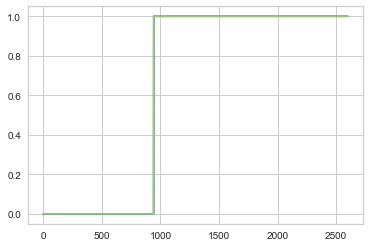

In [77]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(l))

In [78]:
cf3=confusion_matrix(y_test, l)
cf3
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

In [79]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [80]:
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  1.0
Specificity:  1.0
Recall:  1.0


Text(0.5, 1, 'Confusion Matrix')

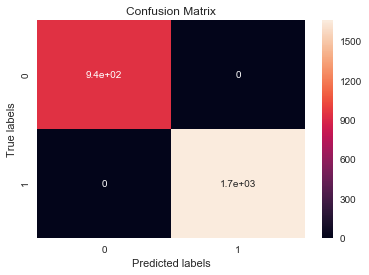

In [81]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

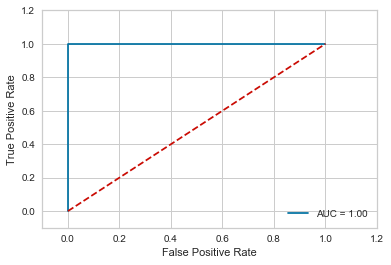

In [82]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, l)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

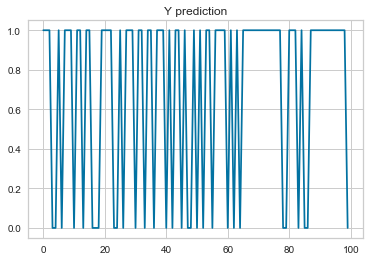

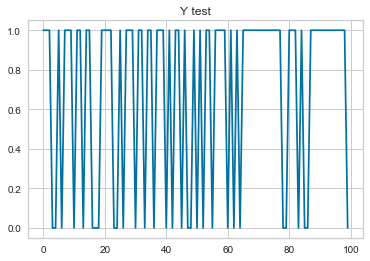

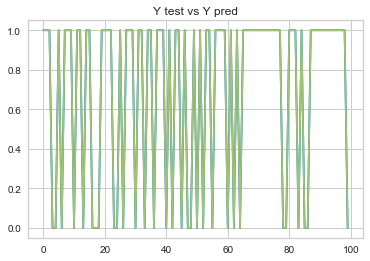

In [83]:
plt.title("Y prediction")
plt.plot(l[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(l[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

# Cross validation code for nonlinear logistic regression 

In [84]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            list1=[]
            X_train=[]
            X_train = np.array(X_train)
            T_train=[]
            T_train = np.array(T_train)
            ft = 1
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            #X_train = X_partitioned[not i and not k]
            #T_train = T_partitioned[not i and not k]
            
            for j in range(0,5):
                if(j!=i and j!=k):
                    list1.append(j)
                    
            for j in list1:
                if ft == 1 :
                    X_train = X_partitioned[j]
                    T_train = T_partitioned[j]
                    ft = 0
                else :
                    X_train = np.vstack((X_train,X_partitioned[j]))
                    T_train = np.vstack((T_train,T_partitioned[j]))
                #T_train.concatenate(T_partitioned[j], axis=0)
            
            #X_train = np.array(X_train)
            #T_train = np.array(T_train)
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

### Cross validation's explaination of code is given at the start of this assignment


The difference is that we'll be finding the parameters which gives maximum f1 score to our model. We keep on appending it out best list of parameters and best list of f1 score. Below is the implemented version of the CV along with the results of CV. 

In [85]:
T = add_ones(np.array(y_Dataframe).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [86]:
models = [[13,5,2], [13,7,2],[13,9,2], [13,3,2]]
bestAccuracy,bestParam = (cross_validate(np.array(X_Dataframe), T, models))

Test number:  0
K is :  0
K is :  1
[[13, 5, 2], [13, 7, 2], [13, 9, 2], [13, 3, 2]]
[0.0003817521766743052, 0.00020391696412601625, 0.00029781029525984345, 0.00020504731691158373]
0.00020391696412601625
[13, 7, 2]
K is :  2
[[13, 5, 2], [13, 7, 2], [13, 9, 2], [13, 3, 2]]
[0.0003664964682644617, 0.0002805927939741447, 0.000473111532324295, 0.0004019234820006128]
0.0002805927939741447
[13, 7, 2]
K is :  3
[[13, 5, 2], [13, 7, 2], [13, 9, 2], [13, 3, 2]]
[0.00022308940047702583, 0.0010846066018046331, 0.00038222677031641883, 0.00018612954124663615]
0.00018612954124663615
[13, 3, 2]
K is :  4
[[13, 5, 2], [13, 7, 2], [13, 9, 2], [13, 3, 2]]
[0.0002640155960715042, 0.0001505107091665548, 0.0002082672074503417, 0.00024297692907607397]
0.0001505107091665548
[13, 7, 2]
[[13, 7, 2], [13, 7, 2], [13, 3, 2], [13, 7, 2]]
[0.00020391696412601625, 0.0002805927939741447, 0.00018612954124663615, 0.0001505107091665548]
[13, 3, 2]
Test number:  1
K is :  0
[[13, 5, 2], [13, 7, 2], [13, 9, 2], [13, 3, 

# Testing with optimum parameters

In [87]:
print(bestAccuracy)
print(bestParam)

[0.0004372673982593649, 0.0003649266420213998, 0.0004272439957828204, 0.00039767661418768803, 0.00011051203113982175]
[[13, 3, 2], [13, 3, 2], [13, 3, 2], [13, 3, 2], [13, 5, 2]]


In [88]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [89]:
nn = NeuralNetLogReg([13,7,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

In [90]:
y_pred1=l
y_test1=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test1, y_pred1))
print('Accuracy:', accuracy_score(y_test1, y_pred1))

F1 score: 1.0
Accuracy: 1.0


# Discussions about parameter/network structure choice

## Explanation of CV results

3 layer neural network is built for classification dataset. Input layer has 10 nodes because there are 10 features in my data. Output layer has 2 nodes.

I tried for the best network structure by changing the number of nodes in hidden layer. After performing 5 fold cross validation(with test,validate and training set), performed 5 fold cross validation by passing my models variable as [[13, 3, 2], [13, 3, 2], [13, 3, 2], [13, 3, 2], [13, 5, 2]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes.

From the results of cross validation we can see that model [13, 3, 2] has appeared more number of times with minimum RMSE. The rmse values returned for [13, 3, 2] in the final result are [0.0004372673982593649, 0.0003649266420213998, 0.0004272439957828204, 0.00039767661418768803] and for [13, 5, 2] as [0.00011051203113982175]

The model with number of nodes in hidden layer 3 works better. With more number of nodes in hidden layer network its overfitting the data.

Hence, I've used [13, 3, 2] as the final structure and I got F1 score: 1 and Accuracy: 1. 

### Discussions about Prediction results

In this assignment I have performed nonlinear logistic regression analysis using Neural network which is nonlinear regression problem. On training the model using NeuralNet with optimum structure [13, 3, 2], model has produced a F1 score: 1 and accuracy value: 1 with optim="scg.

We are free to choose hidden layers, hidden nodes that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used softmax as activation function. The gradient is updating the weights in each layer during back propagation which made network work so well.

# Conclusion

In conclusion, after performing K - fold cross-validation and Neural network model implementation, I don't think that it is easy to say that neural network performed better than the linear regression model for the same regression dataset, because, RMSE we got in regression NN implementation is pretty high. The fact is that in some applications neural networks fits better linear regression model. And it usually occurs when there are nonlinearities involved. Our data seems mostly linear. Though, it is important to evaluate before other aspects. For example, a linear reg model will have fewer parameters to estimate than an NN for the same set of input variables. Then, a NN will require a larger dataset for its optimization to get its benefit of generalization and nonlinear mapping. So, if we do not have enough data, despite existing nonlinearities involved, a LINEAR reg model may be better adjusted.

Also, I learned implementation cross-validation from scratch without using any libraries. Dividing data for each iteration under validation, test and train data and keeping track of RMSEs along with respective parameters found quite challenging.

# Refereneces

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez , "Wine Quality Data Set", https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017 https://icenamor.github.io/files/books/Hands-on-Machine-Learning-with-Scikit-2E.pdf

Neural Network Class Note
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.ipynb

Non linear Logistic Regression Class note
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb

Latex Symbols https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols

How to evaluate the performance of a model in Azure ML and understanding “Confusion Metrics” https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

Understanding AUC - ROC Curve                                                 https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5